## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [2]:
import os
import keras
import itertools
from keras import optimizers
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
"""Code Here
設定超參數
"""
b_size = 128
epochs = 50
drp_ratio = [0.2, 0.5, 0.7]


In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for d in drp_ratio:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = optimizers.Adam()
    model.compile(loss="categorical_crossentropy",
                  metrics=["accuracy"],
                  optimizer=optimizer,
                 )
    
    model.fit(x_train, y_train,
              epochs=epochs, 
              batch_size=b, 
              validation_data=(x_test, y_test),
             )
    
    tag = f'drop_out_with_ratio_{d}'
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[tag] = dict(train_loss=train_loss, valid_loss=valid_loss, train_acc=train_acc, valid_acc=valid_acc)


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0   

50000/50000 [==============================] - 44s 875us/step - loss: 1.6392 - accuracy: 0.4116 - val_loss: 1.5980 - val_accuracy: 0.4287
Epoch 47/50
50000/50000 [==============================] - 41s 823us/step - loss: 1.6316 - accuracy: 0.4130 - val_loss: 1.5989 - val_accuracy: 0.4233
Epoch 48/50
50000/50000 [==============================] - 42s 832us/step - loss: 1.6336 - accuracy: 0.4092 - val_loss: 1.5776 - val_accuracy: 0.4412
Epoch 49/50
50000/50000 [==============================] - 40s 810us/step - loss: 1.6300 - accuracy: 0.4134 - val_loss: 1.5817 - val_accuracy: 0.4376
Epoch 50/50
50000/50000 [==============================] - 41s 826us/step - loss: 1.6261 - accuracy: 0.4128 - val_loss: 1.5642 - val_accuracy: 0.4345
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_______________________________________________

50000/50000 [==============================] - 41s 819us/step - loss: 1.6587 - accuracy: 0.4011 - val_loss: 1.6142 - val_accuracy: 0.4250
Epoch 42/50
50000/50000 [==============================] - 40s 808us/step - loss: 1.6574 - accuracy: 0.4011 - val_loss: 1.6057 - val_accuracy: 0.4316
Epoch 43/50
50000/50000 [==============================] - 40s 807us/step - loss: 1.6500 - accuracy: 0.4013 - val_loss: 1.5738 - val_accuracy: 0.4443
Epoch 44/50
50000/50000 [==============================] - 40s 807us/step - loss: 1.6593 - accuracy: 0.4012 - val_loss: 1.5741 - val_accuracy: 0.4392
Epoch 45/50
50000/50000 [==============================] - 41s 814us/step - loss: 1.6567 - accuracy: 0.4012 - val_loss: 1.6068 - val_accuracy: 0.4334
Epoch 46/50
50000/50000 [==============================] - 41s 815us/step - loss: 1.6496 - accuracy: 0.4057 - val_loss: 1.5858 - val_accuracy: 0.4308
Epoch 47/50
50000/50000 [==============================] - 40s 806us/step - loss: 1.6498 - accuracy: 0.4047 - va

50000/50000 [==============================] - 41s 825us/step - loss: 1.6291 - accuracy: 0.4139 - val_loss: 1.5826 - val_accuracy: 0.4321
Epoch 37/50
50000/50000 [==============================] - 40s 798us/step - loss: 1.6240 - accuracy: 0.4098 - val_loss: 1.6049 - val_accuracy: 0.4200
Epoch 38/50
50000/50000 [==============================] - 40s 810us/step - loss: 1.6307 - accuracy: 0.4105 - val_loss: 1.5620 - val_accuracy: 0.4433
Epoch 39/50
50000/50000 [==============================] - 40s 805us/step - loss: 1.6367 - accuracy: 0.4059 - val_loss: 1.5844 - val_accuracy: 0.4301
Epoch 40/50
50000/50000 [==============================] - 40s 799us/step - loss: 1.6310 - accuracy: 0.4087 - val_loss: 1.5614 - val_accuracy: 0.4461
Epoch 41/50
50000/50000 [==============================] - 40s 809us/step - loss: 1.6244 - accuracy: 0.4119 - val_loss: 1.5467 - val_accuracy: 0.4498
Epoch 42/50
50000/50000 [==============================] - 40s 809us/step - loss: 1.6215 - accuracy: 0.4119 - va

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

'Code Here\n將結果繪出\n'

In [24]:
results['drop_out_with_ratio_0.2'].keys()

dict_keys(['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])

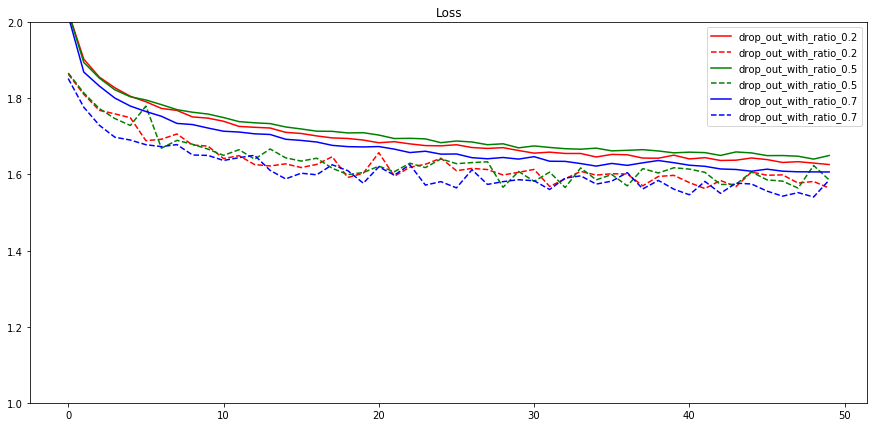

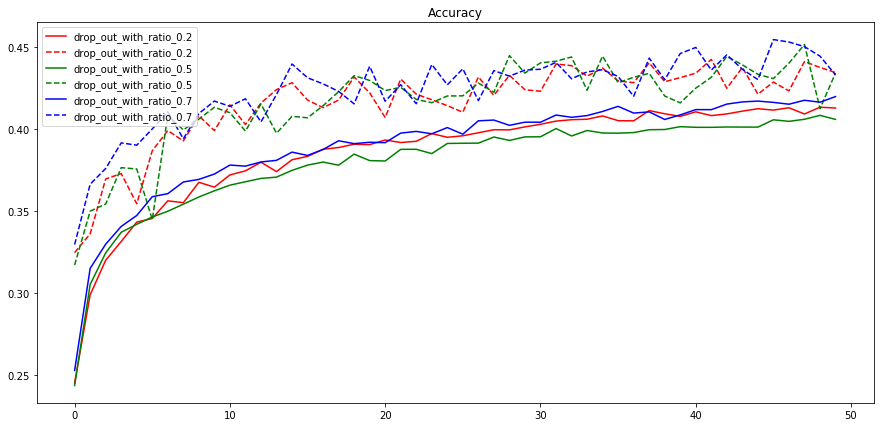

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(15,7))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([1, 2])
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(15,7))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc=2)
plt.show()